In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Générer les données #

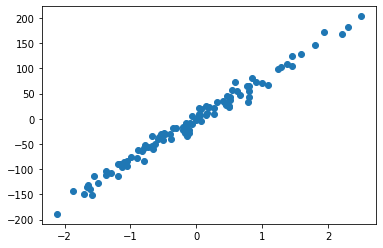

In [19]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x, y)

In [20]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [21]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
X

array([[-1.10006372e+00,  1.00000000e+00],
       [-7.96051081e-01,  1.00000000e+00],
       [-6.71118584e-01,  1.00000000e+00],
       [ 8.01879294e-01,  1.00000000e+00],
       [ 7.70193944e-01,  1.00000000e+00],
       [ 4.52816992e-01,  1.00000000e+00],
       [-8.85947848e-01,  1.00000000e+00],
       [-4.68968162e-01,  1.00000000e+00],
       [ 5.07175076e-01,  1.00000000e+00],
       [-1.49253871e+00,  1.00000000e+00],
       [-7.14898007e-02,  1.00000000e+00],
       [-9.62469911e-02,  1.00000000e+00],
       [-1.05404583e+00,  1.00000000e+00],
       [ 3.88677772e-02,  1.00000000e+00],
       [ 2.62258028e-01,  1.00000000e+00],
       [ 8.48151222e-01,  1.00000000e+00],
       [ 6.20980046e-01,  1.00000000e+00],
       [ 1.93641984e+00,  1.00000000e+00],
       [-5.08098128e-01,  1.00000000e+00],
       [ 1.44854367e+00,  1.00000000e+00],
       [-1.36806418e+00,  1.00000000e+00],
       [ 3.98832736e-01,  1.00000000e+00],
       [ 2.49031831e+00,  1.00000000e+00],
       [-1.

In [22]:
theta = np.random.randn(2, 1)
theta

array([[-1.41343427],
       [ 0.03071636]])

# 2. Définition du modèle #

In [23]:
def model(X,theta):
    return X.dot(theta)

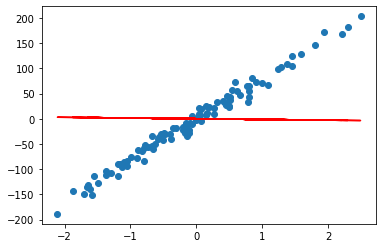

In [24]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c = 'r')

# 3. Fonction coût #

In [25]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [26]:
cost_function(X, y, theta)

3324.0816378108693

# 4. Descente de gradient #

In [27]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [28]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y , theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Entraînement #

In [29]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

In [30]:
theta_final

array([[80.66832548],
       [-1.02927838]])

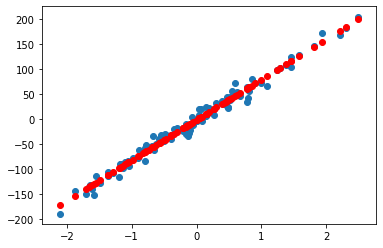

In [35]:
predictions = model (X, theta_final)
plt.scatter(x, y)
plt.scatter(x, predictions, c = 'r')

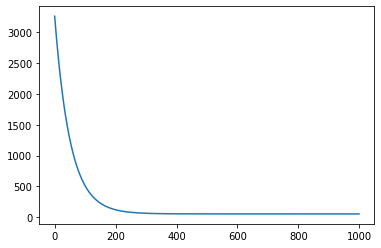

In [32]:
plt.plot(range(1000), cost_history)

In [33]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [34]:
coef_determination(y, predictions)

0.9834720717049706